# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("blackfriday.csv", index_col = 0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [31]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [32]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [33]:
data = data.drop("User_ID", axis=1)
data = data.drop("Product_Category_3", axis=1)

In [34]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(9)
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [35]:
obj_columns = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

for col in obj_columns:
    data[col] = data[col].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product_ID                  4998 non-null   object
 1   Gender                      4998 non-null   object
 2   Age                         4998 non-null   object
 3   Occupation                  4998 non-null   object
 4   City_Category               4998 non-null   object
 5   Stay_In_Current_City_Years  4998 non-null   object
 6   Marital_Status              4998 non-null   object
 7   Product_Category_1          4998 non-null   object
 8   Product_Category_2          4998 non-null   object
 9   Purchase                    4998 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 429.5+ KB


In [36]:
# 통계량 구하기 함수
def get_min_max_avg(df, feature):
    print('Feature: ', feature)
    print('The max value is:',df[feature].max())
    print('The min value is:',df[feature].min())
    print('The average value is:',df[feature].mean())
    print('The median value is:',df[feature].median())
    

# histograme 그리기 함수    
def plot_hist(df, feature, max_ylim, bins=10):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df[feature], bins=bins)
    ax.set_ylim(0, max_ylim)
    ax.set_title(feature+' distribution (bins='+str(bins)+')')
    plt.show()

In [37]:
get_min_max_avg(data, 'Purchase')

Feature:  Purchase
The max value is: 23913
The min value is: 13
The average value is: 9234.655462184874
The median value is: 8049.0


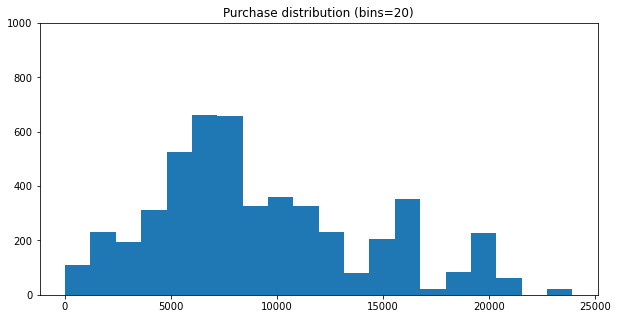

In [38]:
plot_hist(data, 'Purchase', 1000, 20)

In [40]:
y = data['Gender']
X = data.drop("Gender", axis = 1)

In [41]:
# 타깃변수 Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [42]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

# stratify 옵션을 통해 타깃 변수의 비율을 유지하며 train-test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   shuffle = True,
                                                   random_state = 1015,
                                                   stratify = y)

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_columns:
    X_train.loc[:, col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1, 1))
    X_test.loc[:, col] = scaler.transform(np.array(X_test[col]).reshape(-1, 1))

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

X_all = pd.concat([X_train, X_test], axis = 0).reset_index(drop=True)

ohe.fit(X_all[cat_columns])

OneHotEncoder(sparse=False)

In [46]:
new_X = ohe.transform(X_all[cat_columns])

ohe_columns = ohe.categories_[0].tolist()

for idx in range(len(ohe.categories_)-1):
    ohe_columns += ohe.categories_[idx+1].tolist()
    
len(ohe_columns)

1872

In [47]:
X_cat = pd.DataFrame(new_X, columns = ohe_columns)
X_cat.head()

,P00000142,P00000242,P00000342,P00000442,P00000642,P00000742,P00001042,P00001142,P00001242,P00001342,...,17.0,18.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
X_all.drop(columns=cat_columns, inplace=True)

X = pd.concat([X_all, X_cat], axis = 1)

In [49]:
# train, test 데이터 분리
X_train = X.iloc[:X_train.shape[0], :]
X_test = X.iloc[X_train.shape[0]:, :]

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.760


In [52]:
results = knn.predict(X_test)
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,0,1,total
Real,,,
0,68,179,247
1,61,692,753
total,129,871,1000


In [53]:
np.unique(y_test).tolist()

[0, 1]

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test,results, digits=2))

              precision    recall  f1-score   support

           0       0.53      0.28      0.36       247
           1       0.79      0.92      0.85       753

    accuracy                           0.76      1000
   macro avg       0.66      0.60      0.61      1000
weighted avg       0.73      0.76      0.73      1000



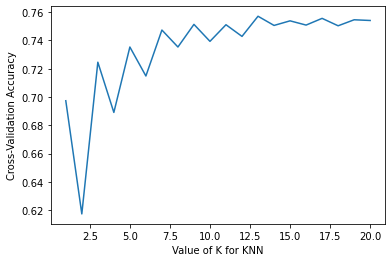

In [55]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))           # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = "accuracy")    # 10-fold cross-validation
    k_score.append(scores.mean())                    # 10-fold 각각 정확도의 평균으로 성능계산

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_probs = knn.predict_proba(X_test)
y_probs1 = y_probs[:, 0]

In [58]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 101)
acc = []

for t in thresholds:
    y_pred = y_probs1 <= t
    acc.append(accuracy_score(y_test, y_pred))
    
best_threshold = thresholds[np.argmax(acc)]

In [59]:
print("정확도는 임곗값이 t={0}일 때 {1:.2f}".format(best_threshold, acc[np.argmax(acc)] * 100))
print("임곗값이 0.5일 때 정확도는 {0:.2f}".format(acc[list(thresholds).index(0.5)] * 100))

정확도는 임곗값이 t=0.6일 때 76.40
임곗값이 0.5일 때 정확도는 76.00


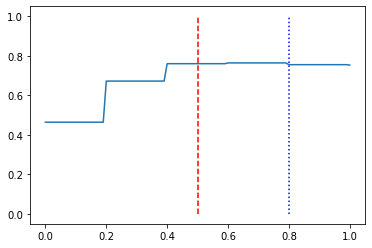

In [60]:
plt.plot(thresholds, acc)
plt.vlines(0.5, 0, 1, colors='r', linestyles='dashed')
plt.vlines(0.8, 0, 1, colors='b', linestyle='dotted')